In [10]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import random

from quantum_beauty_class import qm_beautycontest

np.random.seed(42)
random.seed(42)


In [11]:
#Input
num_players = 100
num_states = 100
mutation_rate = 0.5
mutation_strength = 0.05 
contr_factor = 0.5
fitness_type = 'measured'
num_elite = 20

num_rounds = 10000

#Measured data
times_won = np.zeros(num_players)
times_elite = np.zeros(num_players)
winning_exp_val = np.zeros(num_rounds)
winning_std_val = np.zeros(num_rounds)
measured_states = np.zeros(num_rounds)
winning_weights = np.zeros((num_states, num_rounds))

In [12]:
#Run measurement
QMB = qm_beautycontest(num_players, num_states, mutation_rate, mutation_strength, contr_factor, fitness_type, num_elite)

for j in range(num_rounds):
    QMB.play_round()
    measured_states[j] = QMB.measured_state
    for i in QMB.elite:
        times_elite[i] += 1
    times_won[QMB.winner] += 1
    winning_exp_val[j] = QMB.players[QMB.winner].comp_exp_val()
    winning_std_val[j] = QMB.players[QMB.winner].comp_std_val()
    winning_weights[:, j] = QMB.players[QMB.winner].comp_weights()

<BarContainer object of 100 artists>

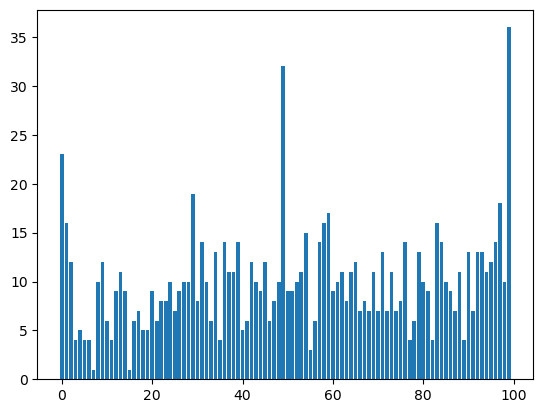

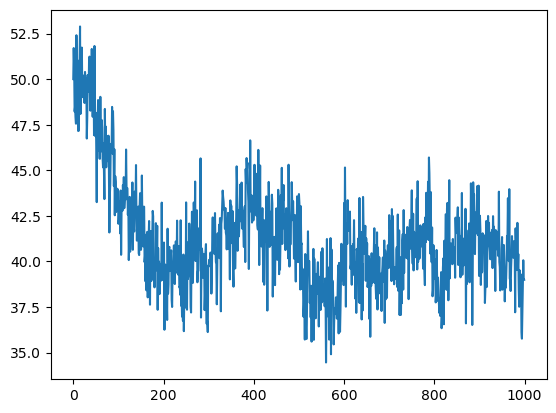

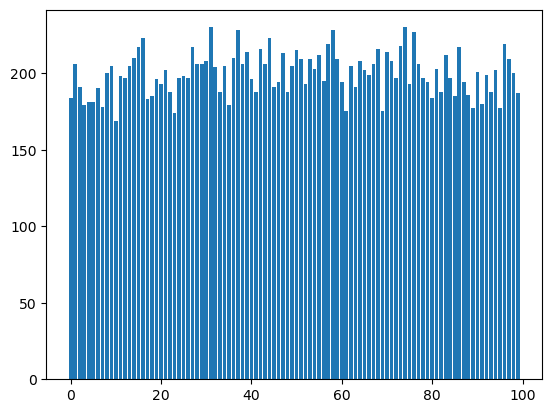

In [13]:
#Plot results
rounds = np.arange(num_rounds)
players = np.arange(num_players)
states = np.arange(num_states)


fig1, ax1 = plt.subplots()
ax1.bar(players, times_won)

fig2, ax2 = plt.subplots()
ax2.plot(rounds, winning_exp_val)

fig3, ax3 = plt.subplots()
ax3.bar(players, times_elite)